In [25]:
'''
Project Overview:
In this project, we are looking at a housing dataset.
The end goal is to predict the sale price of a house
based on features in the dataset (such as overall 
quality, square footage, lot area, etc.). This notebook
is exploring the data to see what kinds of correlations 
there are and give an idea of what model may work best.
'''
import pandas as pd
import matplotlib.pyplot as plt

housing = pd.read_csv("train.csv")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [2]:
# There are a lot of catagories with missing values
# First let's split this into a train and test set.
from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split(housing, test_size=0.2, random_state=42)

In [3]:
# Look at the correlation matrix (bivariate correlation) 
# to see possible linear correlation between variables
corr_matrix = housing_train.corr()
housing_corr = corr_matrix.SalePrice.sort_values(ascending=False)
print(housing_corr)

SalePrice        1.000000
OverallQual      0.785555
GrLivArea        0.695652
GarageCars       0.640991
GarageArea       0.624139
TotalBsmtSF      0.597766
1stFlrSF         0.587883
FullBath         0.552546
TotRmsAbvGrd     0.520388
YearBuilt        0.516501
YearRemodAdd     0.508593
GarageYrBlt      0.480351
MasVnrArea       0.459123
Fireplaces       0.457549
BsmtFinSF1       0.359460
LotFrontage      0.330066
WoodDeckSF       0.329843
2ndFlrSF         0.314030
OpenPorchSF      0.299969
HalfBath         0.280481
LotArea          0.266204
BsmtFullBath     0.226346
BsmtUnfSF        0.222487
BedroomAbvGr     0.156211
ScreenPorch      0.119172
PoolArea         0.115630
3SsnPorch        0.051532
MoSold           0.041890
BsmtFinSF2      -0.005731
YrSold          -0.009099
LowQualFinSF    -0.011189
Id              -0.019643
MiscVal         -0.020179
BsmtHalfBath    -0.048346
OverallCond     -0.074391
MSSubClass      -0.088081
KitchenAbvGr    -0.142785
EnclosedPorch   -0.149532
Name: SalePr

In [4]:
# We will only look at variables that have greater correlation
# than 0.6 for this exploration
attrb = housing_corr[housing_corr>0.6].keys()
print(attrb)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')


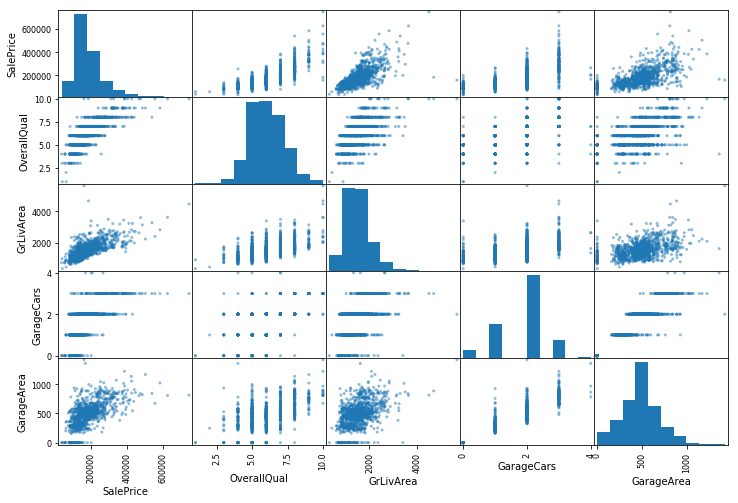

In [5]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing_train[attrb], figsize=(12, 8))
plt.show()

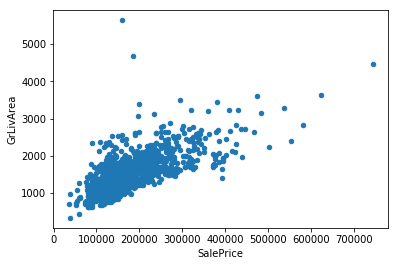

In [6]:
 '''
 This gives a good idea of some variables that contribute
 to the sale price of a house. If we look at GrLivArea, 
 we can see some possible outliers we may need to handle
 later on.
 '''
housing_train.plot(kind="scatter", x="SalePrice", y="GrLivArea")

In [27]:
# Experiment with some other attribute combinations
housing_train = housing_train.copy()
housing_train.loc[:,'LivingSF'] = housing_train['1stFlrSF'] + housing_train['2ndFlrSF']
# housing_train.loc[:,'FinishedSF']
# housing_train.corr()

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
254    255          20       RL         70.0     8400   Pave   NaN      Reg   
1066  1067          60       RL         59.0     7837   Pave   NaN      IR1   
638    639          30       RL         67.0     8777   Pave   NaN      Reg   
799    800          50       RL         60.0     7200   Pave   NaN      Reg   
380    381          50       RL         50.0     5000   Pave  Pave      Reg   

     LandContour Utilities    ...     Fence MiscFeature MiscVal MoSold YrSold  \
254          Lvl    AllPub    ...       NaN         NaN       0      6   2010   
1066         Lvl    AllPub    ...       NaN         NaN       0      5   2009   
638          Lvl    AllPub    ...     MnPrv         NaN       0      5   2008   
799          Lvl    AllPub    ...     MnPrv         NaN       0      6   2007   
380          Lvl    AllPub    ...       NaN         NaN       0      5   2010   

     SaleType SaleCondition  SalePrice